<a href="https://colab.research.google.com/github/Pravallika41296/IANNWTF_Homework_Group24/blob/main/IANNWTF_Homework05_Group24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the necessary packages
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

Dataset : Cifar10



Sample size : 60,000, equal sizes so no resizing required

Labels : 10 categories, categoricalcrossentropy would be used

## **Step 1:**
To do :

1. Load the data, method load_data()
2. Preprocess the data accordingly 
Shuffling,
Batching (64),
Normalize the images,
one hot encode the labels (10),
data augmentation (optional)
3. Print some of the images with labels 

Put the labels in the list and match the label classes to the list n=index while printing



In [2]:
#Loading the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#Flattens the array of lists into a single dimension array
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

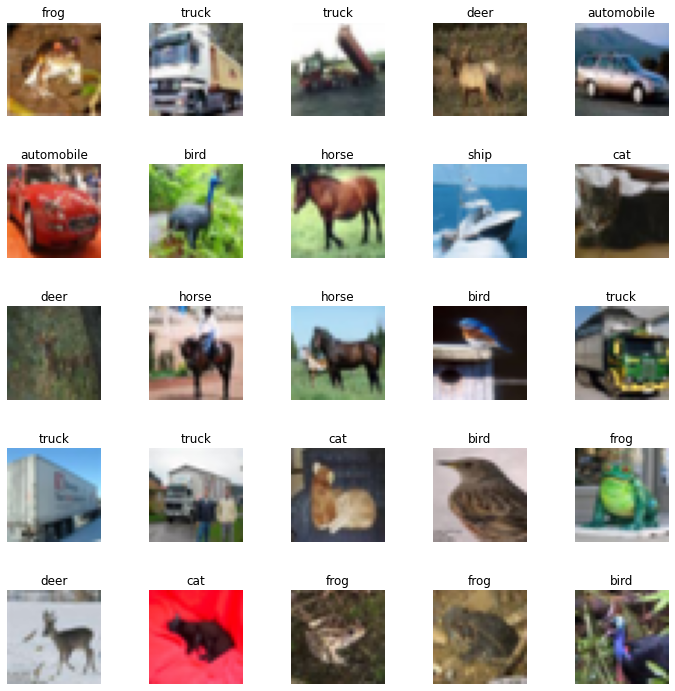

In [4]:
#Providing the text labels for each of the image data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
                'ship', 'truck']

#Visualizing some images with labels
fig, ax = plt.subplots(5,5,figsize=(10,10))
fig.tight_layout()
ax = ax.flatten()
for i in range(25):

    # Readout an image and the corresponding label.
    img = train_images[i]
    lbl = train_labels[i]

    ax[i].imshow(img)
    ax[i].set_title(class_names[train_labels[i]])
    ax[i].axis("off")


In [5]:

# Preparing the data
batch_size = 64
prefetch_size = tf.data.experimental.AUTOTUNE

train_dataset_images = tf.data.Dataset.from_tensor_slices(train_images)
#Centering the input images near zero
train_dataset_images = train_dataset_images.map(lambda img : tf.cast(2*(img/255)-1, tf.float32))

train_dataset_targets = tf.data.Dataset.from_tensor_slices(train_labels)
#onehot encoding the labels
train_dataset_targets = train_dataset_targets.map(lambda t : tf.one_hot(t, 10))
# zip together input and labels
train_dataset = tf.data.Dataset.zip((train_dataset_images, train_dataset_targets))
train_dataset = train_dataset.shuffle(buffer_size=batch_size)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size=prefetch_size)

test_dataset_images = tf.data.Dataset.from_tensor_slices(test_images)
test_dataset_images = test_dataset_images.map(lambda img : tf.cast(2*(img/255)-1, tf.float32))

test_dataset_targets = tf.data.Dataset.from_tensor_slices(test_labels)
#onehot encoding the labels
test_dataset_targets = test_dataset_targets.map(lambda t : tf.one_hot(t, 10))
# zip together input and labels
test_dataset = tf.data.Dataset.zip((test_dataset_images, test_dataset_targets))

test_dataset = test_dataset.shuffle(buffer_size=batch_size)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.prefetch(buffer_size=prefetch_size)


In [ ]:
#Checking the dimensions of the 
for (img,label) in test_dataset:
    print(img.shape)# the first dimension is the batch size / number of inputs
    break;

(64, 32, 32, 3)


## **Step 2**: 
Building the model 

To do 

1.   CNN model

Use the last homework's CNN for reference and make changes

6 convolutional layers to reach the accuracy of 80%

Readout layer, flatten or globalPool the layer

2.  Use the optimization techniques 

( optimizers, weight penalties, dropout, batch normalization, data augmentation) 

Batch norm comes first then activation , then Dropout; the order
3. Data augmentation is optional 



In [ ]:
class Model(Model): 
    
    def __init__(self, seed):
        super(Model, self).__init__()
        # Define the layers.
        self.layers_list = [
            tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                    input_shape=(32,32,3),
                                    padding='same',
                                    kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                    kernel_regularizer = tf.keras.regularizers.l2(0.01)
                                               ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                               padding='same',
                                               kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                               kernel_regularizer = tf.keras.regularizers.l2(0.01)
                                               ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                                               padding='same',
                                                kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                   kernel_regularizer = tf.keras.regularizers.l2(0.01)
                                                ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                                               padding='same',
                                               kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                   kernel_regularizer = tf.keras.regularizers.l2(0.01)
                                                ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),

            tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                                            padding='same',
                                            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                   kernel_regularizer = tf.keras.regularizers.l2(0.01)
                                            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            tf.keras.layers.Dropout(0.4),

            tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                                            padding='same',
                                            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                            kernel_regularizer = tf.keras.regularizers.l2(0.01)
                                            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation('relu'),

            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax,
                                  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed),
                                            kernel_regularizer = tf.keras.regularizers.l2(0.01)     
                                                                 )

        ]
    @tf.function
    def call(self, x, training):
        # Define the forward step.
        for layer in self.layers_list:
          x = layer(x, training = training)
        return x

# Step 3 : 
Training the model 

To do: 


1. 60% accuracy to pass, 85% for OS  
2. Training Hyperparameters

  Epochs : 30
  
  Learning rate : 0.001

  Optimizer : adam

  Loss : CategoricalCrossEntropy()

  Accuracy : check out the acc_metric from the data_aug code


In [ ]:
#Function for the accuracy measure 
def acc_metric(target,output):
    acc = np.argmax(target, axis=1) == np.argmax(output, axis=1) 
    acc = np.mean(acc)
    return acc

In [ ]:
#Defining the training and testing functions
def train_step(model, input, target, loss_function, optimizer, training = True):

  with tf.GradientTape() as tape:
    prediction = model(input, training)
    loss = loss_function(target, prediction) 
    gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss 

def test(model, test_data, loss_function, training =False):
  # test over complete test data

  test_accuracy_aggregator = []
  test_loss_aggregator = []

  for (input, target) in test_data:
    prediction = model(input, training)
    sample_test_loss = loss_function(target, prediction)
    sample_test_accuracy =  acc_metric(target, prediction)

    test_loss_aggregator.append(sample_test_loss.numpy())
    test_accuracy_aggregator.append(sample_test_accuracy)

  test_loss = np.mean(test_loss_aggregator)
  test_accuracy = np.mean(test_accuracy_aggregator)

  return test_loss, test_accuracy
  

In [ ]:
tf.keras.backend.clear_session()

### Hyperparameters
num_epochs = 30
learning_rate = 0.001
running_average_factor = 0.95
seed = 1

# Initialize the model.
model = Model(seed)
# Initialize the loss: categorical cross entropy
cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()
# Initialize the optimizer: Adam
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Initialize lists for later visualization.
train_losses = []
test_losses = []
test_accuracies = []

#testing once before we begin
test_loss, test_accuracy = test(model, test_dataset, cross_entropy_loss)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

#check how model performs on train data once before we begin
train_loss, _ = test(model, train_dataset, cross_entropy_loss)
train_losses.append(train_loss)


# We train for num_epochs epochs.
for epoch in range(num_epochs):
    print('Epoch: __ ' + str(epoch))

    #training (and checking in with training)
    average = []
    for (image,target) in train_dataset:
        train_loss = train_step(model, image , target, cross_entropy_loss, optimizer)
        average.append(train_loss)       
            
    train_losses.append(np.mean(average))
    
    #testing
    test_loss, test_accuracy = test(model, test_dataset, cross_entropy_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    #print('Test Accuracy: ', test_accuracy)


Epoch: __ 0
Epoch: __ 1
Epoch: __ 2
Epoch: __ 3
Epoch: __ 4
Epoch: __ 5
Epoch: __ 6
Epoch: __ 7
Epoch: __ 8
Epoch: __ 9
Epoch: __ 10
Epoch: __ 11
Epoch: __ 12
Epoch: __ 13
Epoch: __ 14
Epoch: __ 15
Epoch: __ 16
Epoch: __ 17
Epoch: __ 18
Epoch: __ 19
Epoch: __ 20
Epoch: __ 21
Epoch: __ 22
Epoch: __ 23
Epoch: __ 24
Epoch: __ 25
Epoch: __ 26
Epoch: __ 27
Epoch: __ 28
Epoch: __ 29


## **Step 4**:
Visualization 

To do :

1.   Plot train and test loss
2.   Plot test accuracy
3. Plotting within the training loop can help better visualization



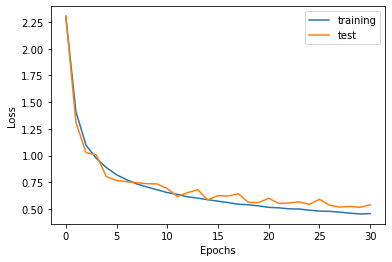

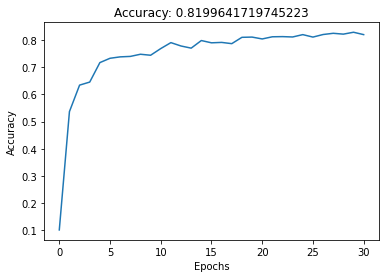

In [ ]:
# Visualize accuracy and loss for training and test data. 
# One plot training and test loss.
# One plot training and test accuracy.
plt.figure()
line1, = plt.plot(train_losses)
line2, = plt.plot(test_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend((line1,line2),("training","test"))
plt.show()

plt.figure()
line1, = plt.plot(test_accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy: " + str(test_accuracies[-1]))
plt.show()
